## Portages Bank Telemarketing Analysis
<p>Part 1</p>

### Main objective:
<p>Predict customers' response to its telemarketing campaign and establish
a target customer profile for future marketing plans.</p>

<p>We'll do this by analyzing customer features, such as demographics and transaction history, the bank
will be able to predict customer saving behaviours and identify which type of customers
is more likely to make term deposits.</p>

### Loading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os

file = 'bank-full.csv'
dataset1 = pd.read_csv(file, sep = ';')

In [2]:
dataset1.shape

(45211, 17)

<p>There are 45,211 observation in this dataset. Each represent an existing customer that the
bank reached via a phone call. For each observation the dataset records 16 input variables that are
both qualitative and quantitative attributes</p>
<p>There is a single binary output variable the denotes 'yes' or 'no' showing the outcome of the 
phone calls.</p>

In [3]:
dataset1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
dataset1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

### Cleaning the data

<p>There is no missing values in the dataset however, they are values like 'unknown', 'others', which
are like missing values. So, we removed the values from the dataset</p>

In [5]:
#Delete the rows with columns 'poutcome' contains 'other'
condition = dataset1.poutcome == 'other'
dataset2 = dataset1.drop(dataset1[condition].index, axis=0, inplace=False)


In [6]:
#Replace 'unknown' in job and education with 'other'
dataset2[['job', 'education']] = dataset2[['job', 'education']].replace(['unknown'], 'other')

### Drop outliers in the column 'balance'

<p>To capture general trends in the dataset, outliners in the column "balance" are dropped.
Outliers are defined as values which are more than 3 standard deviations away from the mean.</p>

In [7]:
from scipy.stats import zscore

dataset2[['balance']].mean()
dataset2[['balance']].mean()

dataset2['balance_outliers'] = dataset2['balance']
dataset2['balance_outliers'] = zscore(dataset2['balance_outliers'])

condition1 = (dataset2['balance_outliers']>3) | (dataset2['balance_outliers']<-3)
dataset3 = dataset2.drop(dataset2[condition1].index, axis=0, inplace=False)

In [8]:
dataset4 = dataset3.drop('balance_outliers', axis=1)

### Create and transforming data

In [9]:
#Change column name: 'y' to 'response'
dataset4.rename(index=str, columns={'y': 'response'}, inplace=True)

def convert(dataset4, new_column, old_column):
    dataset4[new_column] = dataset4[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return dataset4[new_column].value_counts()

convert(dataset4, "response_binary", "response")

0    37785
1     4870
Name: response_binary, dtype: int64

In [10]:
#Drop column "contact" which is useless
dataset5 = dataset4.drop('contact', axis=1)

In [11]:
#Change the unit of 'duration' from seconds to minutes
dataset5['duration'] = dataset5['duration'].apply(lambda n: n/60).round(2)

In [12]:
#Change 'month' from words to numbers for easier analysis
first  = [dataset5]
for column in first:
    column.loc[column['month'] == 'jan', 'month_int'] = 1
    column.loc[column['month'] == 'feb', 'month_int'] = 2
    column.loc[column['month'] == 'mar', 'month_int'] = 3
    column.loc[column['month'] == 'apr', 'month_int'] = 4
    column.loc[column['month'] == 'may', 'month_int'] = 5
    column.loc[column['month'] == 'jun', 'month_int'] = 6
    column.loc[column['month'] == 'jul', 'month_int'] = 7
    column.loc[column['month'] == 'aug', 'month_int'] = 8
    column.loc[column['month'] == 'sep', 'month_int'] = 9
    column.loc[column['month'] == 'oct', 'month_int'] = 10
    column.loc[column['month'] == 'nov', 'month_int'] = 11
    column.loc[column['month'] == 'dec', 'month_int'] = 12

### Filtering

In [13]:
#Drop rows that 'duration' < 5s
condition2 = (dataset5['duration']<5/60)
dataset6 = dataset5.drop(dataset5[condition2].index, axis=0, inplace=False)

In [14]:
#Drop customer values with 'other' education
condition3 = (dataset6['education'] == 'other')
dataset7 = dataset6.drop(dataset6[condition3].index, axis=0, inplace=False)

In [15]:
dataset7.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary,month_int
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0,5.0
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0,5.0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0,5.0
5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0,5.0
6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0,5.0


### Part 3: EDA

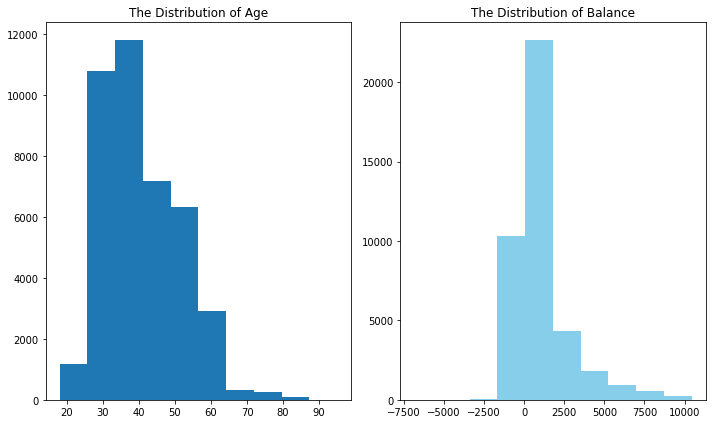

In [16]:
#Visualize the distribution of 'age' and 'balance'
dist_age_balance = plt.figure(figsize=(10,6))

age = dist_age_balance.add_subplot(1, 2, 1)
bal = dist_age_balance.add_subplot(1, 2, 2)

age.hist(dataset7['age'])
age.set_title('The Distribution of Age')

bal.hist(dataset7['balance'], color='skyblue')
bal.set_title('The Distribution of Balance')

plt.tight_layout()
plt.show()

<p><b>The distribution of age:</b> The Majority of the customers called are in the age range of 30 to 40s</p>

<p><b>The distribution of balance:</b> Even after dropping outliers in balance, the range is pretty massive.
The distribution of balance has a huge standard deviation relative to the mean, this could suggest
a large variability in customers' balance levels.</p>


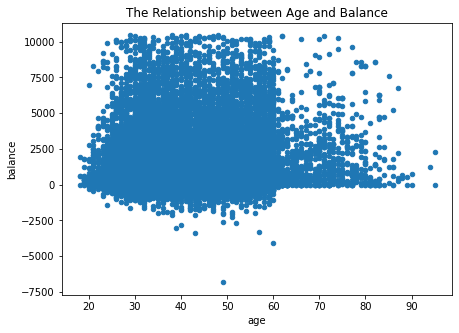

In [17]:
#Visualize the relationship between 'age' and 'balance'
scatter_age_balance = dataset7.plot.scatter('age', 'balance', figsize=(7,5))

plt.title('The Relationship between Age and Balance')
plt.show()

<p>Based on this scatter plot, there is no clear relationship between client's age and balance
level. We can also see that customers over the age of 60, the client tend to have a significantly
lower balance.</p>

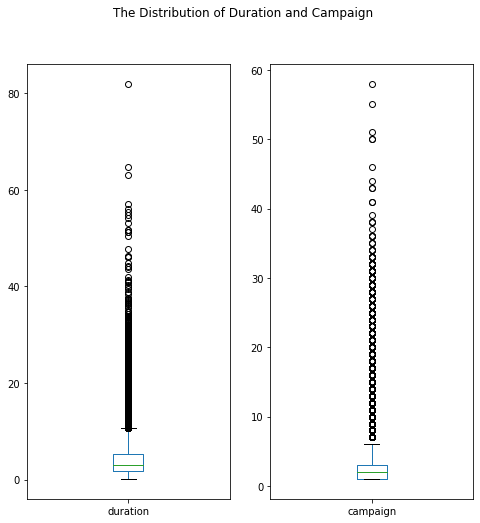

In [18]:
#Visualize the distribution of 'duration' & 'campaign'
dist_dur_cam = dataset7[['duration','campaign']].plot(kind = 'box',
                                                      figsize = (8,8),
                                                      subplots = True, layout = (1,2),
                                                      sharex = False, sharey = False,
                                                      title='The Distribution of Duration and Campaign')
plt.show()
